**Proyek Pertama : Membuat Model NLP dengan TensorFlow**


Berikut kriteria submission yang harus Anda penuhi:

* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

* Harus menggunakan LSTM dalam arsitektur model.

* Harus menggunakan model sequential.

* Validation set sebesar 20% dari total dataset.

* Harus menggunakan Embedding.

* Harus menggunakan fungsi tokenizer.

* Akurasi dari model minimal 75% pada train set dan validation set.



Data Diri:


Nama: Muhammad Faqih Hakim


Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

Import Library yang dibutuhkan

In [9]:
import keras
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import punkt
import string

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

dataset bisa di dapat dari https://www.kaggle.com/datasets/krystalliu152/imbd-movie-reviewnpl

In [17]:
df = pd.read_csv('/content/Review.csv')
df

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...
...,...,...
9995,Positive,I first saw this movie back in the early'90's ...
9996,Positive,"NYC, 2022: The Greenhouse effect, vanished oce..."
9997,Positive,"Those individuals familiar with Asian cinema, ..."
9998,Positive,"The kids, aged 7 to 14, got such a huge kick o..."


Ubah Nilai dari sentiment yang berisi positive dan negative menjadi 1 dan 0(binary classfication text)

In [18]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [19]:
df['sentiment'].dtype

dtype('int64')

In [20]:
df['sentiment'].astype(bool)

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: sentiment, Length: 10000, dtype: bool

Preprocessing Text

In [24]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [25]:
df['review'] = df['review'].apply(preprocess_text)
df

,sentiment,review
0,0,background knowledge movie bought sounded cool...
1,0,huge jane austen fan ordered movie amazonuk co...
2,0,nothing say wow anyone actually somebody sneak...
3,0,like jane austin novels love pride prejudice s...
4,0,day age incredible special movie effects one s...
...,...,...
9995,1,first saw movie back early90s first released r...
9996,1,nyc 2022 greenhouse effect vanished oceans gri...
9997,1,individuals familiar asian cinema whole aware ...
9998,1,kids aged 7 14 got huge kick film gave copy ki...


menentukan Label

In [26]:
review = df['review'].values
label = df['sentiment'].values

Validation set sebesar 20% dari total dataset.

In [27]:
review_train, review_val, label_train, label_val = train_test_split(review, label, test_size=0.2)

Harus menggunakan fungsi tokenizer

In [28]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(review_train)

sequences_train = tokenizer.texts_to_sequences(review_train)
sequences_val = tokenizer.texts_to_sequences(review_val)

padded_train = pad_sequences(sequences_train, maxlen=20, padding='post')
padded_val = pad_sequences(sequences_val, maxlen=20, padding='post')

Implementasi Fungsi Callback

In [30]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') >= 0.75 and logs.get('accuracy') >= 0.8):
            print("\nPelatihan harus dihentikan karena Sudah mencapai target yang diinginkan")
            self.model.stop_training = True

callbacks = myCallback()

Buat Model Sequential, dengan mengimplementasikan Layer Embedding dan TLSM

disini juga saya menggunakan layer Dropout untuk mengatasi overfitting

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=20),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Compile Model

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Latih Model

In [33]:
history = model.fit(padded_train, label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(padded_val, label_val),
                    callbacks=[callbacks])

Epoch 1/20
250/250 [==============================] - 19s 59ms/step - loss: 0.5936 - accuracy: 0.6635 - val_loss: 0.4720 - val_accuracy: 0.7800
Epoch 2/20
250/250 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8434
Pelatihan harus dihentikan karena Sudah mencapai target yang diinginkan
250/250 [==============================] - 13s 52ms/step - loss: 0.3672 - accuracy: 0.8434 - val_loss: 0.4787 - val_accuracy: 0.7740


Plot Loss model

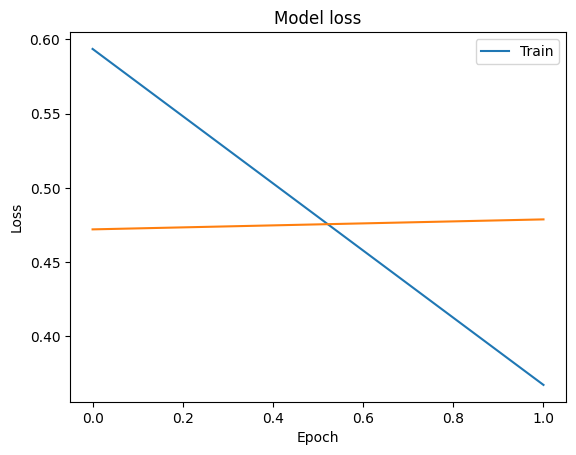

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Plot Akurasi

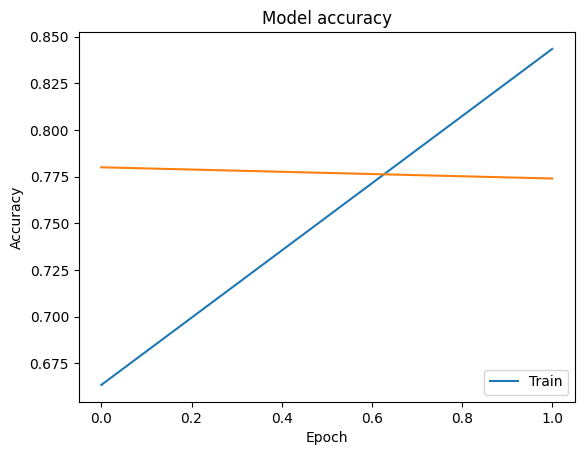

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()